<a href="https://colab.research.google.com/github/Kevin-Wang-McGill/USA-Housing-Price-Prediction/blob/main/Housing_Price_Regression_Problem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<table align="left">
  <td>
    <a href="https://colab.research.google.com/github/ageron/handson-ml3/blob/main/02_end_to_end_machine_learning_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>
  </td>
  <td>
    <a target="_blank" href="https://kaggle.com/kernels/welcome?src=https://github.com/ageron/handson-ml3/blob/main/02_end_to_end_machine_learning_project.ipynb"><img src="https://kaggle.com/static/images/open-in-kaggle.svg" /></a>
  </td>
</table>

**Kevin's End-to-end Machine Learning project**

***Welcome to Kevin's project!***

# Project Overview

This project aims to develop a machine learning model for predicting residential property prices in the United States real estate market. By analyzing various property features and market indicators, we seek to create an accurate price prediction system.

## Data Description

Our dataset comprises 22,681 property listings with 14 key features including:



*   Physical attributes (bedrooms, bathrooms, area)
*   Location data (state, city, coordinates)
*   Market indicators (price per square foot, market estimates)
*   Rental potential indicators



## Project Goals



1.   Apply Data Science Lifecycle methodology to develop a regression model for housing price prediction
2.   Perform comprehensive data analysis and feature engineering on property attributes
3.   Build and evaluate multiple regression models to identify the most effective approach
4.   Create a practical tool that helps predict property values based on listing details



# Version Check

This project requires Python 3.7 or above:

In [180]:
import sys

assert sys.version_info >= (3, 7)

It also requires Scikit-Learn ≥ 1.0.1:

In [181]:
from packaging import version
import sklearn

assert version.parse(sklearn.__version__) >= version.parse("1.0.1")

# Import  Basic libraries

In [182]:
import re
from urllib.request import urlopen
import joblib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from rich import print
from scipy import stats
from sklearn.base import BaseEstimator, RegressorMixin, TransformerMixin
from sklearn.cluster import KMeans
from sklearn.compose import ColumnTransformer, TransformedTargetRegressor
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.exceptions import NotFittedError
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics.pairwise import rbf_kernel
from sklearn.model_selection import GridSearchCV, cross_val_score, train_test_split
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import FunctionTransformer, OneHotEncoder, StandardScaler
from sklearn.tree import DecisionTreeRegressor
from tqdm import tqdm


# Get the Data

## Read the Data

In [183]:
from google.colab import drive
drive.mount('/content/drive')
housing = pd.read_csv("/content/drive/My Drive/Colab Notebooks/McGill - ML 1/usa_housing_price_df.csv")
print(f"Data loaded: {len(housing)} records")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Data loaded: 22681 records

## Take a Quick Look at the Data Structure

In [184]:
housing.head()

,State,City,Street,Zipcode,Bedroom,Bathroom,Area,PPSq,LotArea,MarketEstimate,RentEstimate,Latitude,Longitude,ListedPrice
0,AL,Saraland,Scott Dr,36571.0,4.0,2.0,1614.0,148.636927,0.3805,240600.0,1599.0,30.819534,-88.095960,239900.0
1,AL,Robertsdale,Cowpen Creek Rd,36567.0,3.0,2.0,1800.0,144.388889,3.2000,NaN,NaN,30.590004,-87.580376,259900.0
2,AL,Gulf Shores,Spinnaker Dr #201,36542.0,2.0,2.0,1250.0,274.000000,NaN,NaN,NaN,30.284956,-87.747920,342500.0
3,AL,Chelsea,Mallet Way,35043.0,3.0,3.0,2224.0,150.629496,0.2600,336200.0,1932.0,33.357986,-86.608700,335000.0
4,AL,Huntsville,Turtlebrook Ct,35811.0,3.0,2.0,1225.0,204.081633,NaN,222700.0,1679.0,34.775517,-86.440700,250000.0


In [185]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22681 entries, 0 to 22680
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   State           22681 non-null  object 
 1   City            22681 non-null  object 
 2   Street          22681 non-null  object 
 3   Zipcode         22681 non-null  float64
 4   Bedroom         22667 non-null  float64
 5   Bathroom        22647 non-null  float64
 6   Area            22681 non-null  float64
 7   PPSq            22681 non-null  float64
 8   LotArea         21779 non-null  float64
 9   MarketEstimate  15445 non-null  float64
 10  RentEstimate    16705 non-null  float64
 11  Latitude        22681 non-null  float64
 12  Longitude       22681 non-null  float64
 13  ListedPrice     22681 non-null  float64
dtypes: float64(11), object(3)
memory usage: 2.4+ MB


In [186]:
housing.describe()

,Zipcode,Bedroom,Bathroom,Area,PPSq,LotArea,MarketEstimate,RentEstimate,Latitude,Longitude,ListedPrice
count,22681.000000,22667.000000,22647.000000,22681.000000,22681.000000,21779.000000,1.544500e+04,16705.000000,22681.000000,22681.000000,2.268100e+04
mean,50023.455403,3.393435,2.423299,2128.138398,222.641994,2.354870,4.870383e+05,2624.699192,39.751686,-92.299353,5.324399e+05
std,29570.312497,1.050506,1.157670,1577.512556,202.811788,16.128371,1.155986e+06,4029.614920,5.694751,16.866820,1.574922e+06
min,1002.000000,0.000000,0.000000,120.000000,1.925926,0.000000,1.570000e+04,100.000000,25.449816,-161.772780,4.888000e+03
25%,25419.000000,3.000000,2.000000,1400.000000,132.729544,0.173439,2.306000e+05,1641.000000,35.938618,-103.317760,2.250000e+05
50%,50703.000000,3.000000,2.000000,1849.000000,184.122149,0.299449,3.417000e+05,2149.000000,39.938480,-89.185210,3.449000e+05
75%,74134.000000,4.000000,3.000000,2466.000000,257.118205,0.930000,4.995000e+05,2800.000000,42.936455,-79.108376,4.999000e+05
max,99950.000000,21.000000,25.000000,99990.000000,6117.071334,800.000000,7.195920e+07,212834.000000,65.044370,-67.016030,7.600000e+07


# Object columns analysis & Data Cleaning

**Initially, I planned to use geographical clustering for location analysis in the housing dataset. However, due to the large dataset size (22,681 entries), visualization would be ineffective. Instead, I adopted the 2020 US Census Bureau's classification system, which provides a more structured approach by categorizing locations into regions (Northeast, Midwest, South, West) and city sizes based on population data. This standardized method improves interpretability while maintaining data integrity for our analysis.**

## A quick look for columns

In [187]:
display(housing["State"].value_counts())
display(housing["City"].value_counts())
display(housing["Street"].value_counts())

,count
State,
CT,499
MI,496
NH,495
IN,495
CA,494
AZ,492
MO,492
VA,491
ME,491


,count
City,
Lincoln,237
Las Vegas,223
Albuquerque,111
Kansas City,104
Anchorage,101
...,...
Grandy,1
Kelsey,1
Tenstrike,1


,count
Street,
Main St,44
Main Street,41
S Main St,25
N Main St,21
E Main St,18
...,...
Airport Dr,1
Robin Hood Dr,1
Grey Eagle Dr,1


## Define state-classification function

In [188]:
import pandas as pd
import numpy as np

def transform_housing_data(df):
    # Region mapping according to US Census Bureau classification
    region_mapping = {
        # Northeast states
        'ME': 'Northeast', 'NH': 'Northeast', 'VT': 'Northeast', 'MA': 'Northeast',
        'RI': 'Northeast', 'CT': 'Northeast', 'NY': 'Northeast', 'NJ': 'Northeast',
        'PA': 'Northeast',
        # Midwest states
        'OH': 'Midwest', 'IN': 'Midwest', 'IL': 'Midwest', 'MI': 'Midwest',
        'WI': 'Midwest', 'MN': 'Midwest', 'IA': 'Midwest', 'MO': 'Midwest',
        'ND': 'Midwest', 'SD': 'Midwest', 'NE': 'Midwest', 'KS': 'Midwest',
        # South states
        'DE': 'South', 'MD': 'South', 'DC': 'South', 'VA': 'South',
        'WV': 'South', 'NC': 'South', 'SC': 'South', 'GA': 'South',
        'FL': 'South', 'KY': 'South', 'TN': 'South', 'AL': 'South',
        'MS': 'South', 'AR': 'South', 'LA': 'South', 'OK': 'South', 'TX': 'South',
        # West states
        'MT': 'West', 'ID': 'West', 'WY': 'West', 'CO': 'West',
        'NM': 'West', 'AZ': 'West', 'UT': 'West', 'NV': 'West',
        'WA': 'West', 'OR': 'West', 'CA': 'West', 'AK': 'West', 'HI': 'West'
    }

    # Add region column based on state mapping
    df['Region'] = df['State'].map(region_mapping)

    return df

# Apply transformation
housing_transformed = transform_housing_data(housing)
display(housing_transformed)
housing_transformed.info()

,State,City,Street,Zipcode,Bedroom,Bathroom,Area,PPSq,LotArea,MarketEstimate,RentEstimate,Latitude,Longitude,ListedPrice,Region
0,AL,Saraland,Scott Dr,36571.0,4.0,2.0,1614.0,148.636927,0.3805,240600.0,1599.0,30.819534,-88.095960,239900.0,South
1,AL,Robertsdale,Cowpen Creek Rd,36567.0,3.0,2.0,1800.0,144.388889,3.2000,NaN,NaN,30.590004,-87.580376,259900.0,South
2,AL,Gulf Shores,Spinnaker Dr #201,36542.0,2.0,2.0,1250.0,274.000000,NaN,NaN,NaN,30.284956,-87.747920,342500.0,South
3,AL,Chelsea,Mallet Way,35043.0,3.0,3.0,2224.0,150.629496,0.2600,336200.0,1932.0,33.357986,-86.608700,335000.0,South
4,AL,Huntsville,Turtlebrook Ct,35811.0,3.0,2.0,1225.0,204.081633,NaN,222700.0,1679.0,34.775517,-86.440700,250000.0,South
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22676,WY,Burns,Road 210a,82053.0,2.0,1.0,1112.0,337.230216,20.0000,368600.0,1500.0,41.149517,-104.439620,375000.0,West
22677,WY,Cody,Lincoln Ave,82414.0,2.0,3.0,1232.0,241.801948,0.0300,NaN,NaN,44.524570,-109.033844,297900.0,West
22678,WY,Dubois,Mason Dr,82513.0,2.0,2.0,2016.0,262.896825,1.4200,NaN,2294.0,43.521640,-109.594050,530000.0,West
22679,WY,Cheyenne,Carolina Rd,82009.0,3.0,2.0,2930.0,196.552901,6.2300,558000.0,2749.0,41.138450,-105.052790,575900.0,West


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22681 entries, 0 to 22680
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   State           22681 non-null  object 
 1   City            22681 non-null  object 
 2   Street          22681 non-null  object 
 3   Zipcode         22681 non-null  float64
 4   Bedroom         22667 non-null  float64
 5   Bathroom        22647 non-null  float64
 6   Area            22681 non-null  float64
 7   PPSq            22681 non-null  float64
 8   LotArea         21779 non-null  float64
 9   MarketEstimate  15445 non-null  float64
 10  RentEstimate    16705 non-null  float64
 11  Latitude        22681 non-null  float64
 12  Longitude       22681 non-null  float64
 13  ListedPrice     22681 non-null  float64
 14  Region          22681 non-null  object 
dtypes: float64(11), object(4)
memory usage: 2.6+ MB


## Define city-classification function

In [189]:
import pandas as pd

def get_complete_city_classification():

   city_classifications = {
       # Large cities (based on 2020 Census data)
       'New York': 'Large',
       'Los Angeles': 'Large',
       'Chicago': 'Large',
       'Houston': 'Large',
       'Phoenix': 'Large',
       'Philadelphia': 'Large',
       'San Antonio': 'Large',
       'San Diego': 'Large',
       'Dallas': 'Large',
       'San Jose': 'Large',
       'Jacksonville': 'Large',
       'San Francisco': 'Large',
       'Austin': 'Large',
       'Fort Worth': 'Large',
       'Columbus': 'Large',
       'Indianapolis': 'Large',
       'Charlotte': 'Large',
       'Seattle': 'Large',
       'Denver': 'Large',
       'Washington': 'Large',
       'Boston': 'Large',
       'El Paso': 'Large',
       'Nashville': 'Large',
       'Detroit': 'Large',
       'Oklahoma City': 'Large',
       'Portland': 'Large',
       'Las Vegas': 'Large',
       'Memphis': 'Large',
       'Louisville': 'Large',
       'Baltimore': 'Large',
       'Milwaukee': 'Large',
       'Albuquerque': 'Large',
       'Tucson': 'Large',
       'Fresno': 'Large',
       'Sacramento': 'Large',
       'Atlanta': 'Large',
       'Kansas City': 'Large',
       'Miami': 'Large',
       'Raleigh': 'Large',
       'Minneapolis': 'Large',
       'Cleveland': 'Large',
       'Tulsa': 'Large',
       'Oakland': 'Large',
       'Tampa': 'Large',
       'Aurora': 'Large',

       # Medium cities
       'Bellevue': 'Medium',
       'Berkeley': 'Medium',
       'Bloomington': 'Medium',
       'Boulder': 'Medium',
       'Cambridge': 'Medium',
       'Evanston': 'Medium',
       'Fort Collins': 'Medium',
       'Green Bay': 'Medium',
       'Norman': 'Medium',
       'Palo Alto': 'Medium',
       'Provo': 'Medium',
       'Santa Cruz': 'Medium',
       'Stamford': 'Medium',
       'Syracuse': 'Medium',
       'West Palm Beach': 'Medium',
       'Ann Arbor': 'Medium',
       'Albany': 'Medium',
       'Asheville': 'Medium',
       'Boise': 'Medium',
       'Charleston': 'Medium',
       'Eugene': 'Medium',
       'Fort Lauderdale': 'Medium',
       'Gainesville': 'Medium',
       'Hartford': 'Medium',
       'Lincoln': 'Medium',
       'Madison': 'Medium',
       'New Haven': 'Medium',
       'Providence': 'Medium',
       'Reno': 'Medium',
       'Richmond': 'Medium',
       'Spokane': 'Medium',
       'Tacoma': 'Medium',
       'Tempe': 'Medium',
       'Winston-Salem': 'Medium',
       'Worcester': 'Medium',
       'Anchorage': 'Medium',
       'Cheyenne': 'Medium',
       'Rapid City': 'Medium',
       'Wasilla': 'Medium',
       'Wichita': 'Medium',
       'Wilmington': 'Medium',


       'default': 'Small'  # All unlisted cities default to small
   }

   return city_classifications

def classify_city_size(df):
   """
   Classify cities by size
   Parameters:
       df: DataFrame containing City column
   Returns:
       DataFrame with added CitySize column
   """
   # Get city classification dictionary
   city_classifications = get_complete_city_classification()

   # Create classification function
   def get_city_size(city):
       return city_classifications.get(city, city_classifications['default'])

   # Add CitySize column
   df['CitySize'] = df['City'].apply(get_city_size)

   # Print classification statistics
   print("City Size Distribution:")
   print(df['CitySize'].value_counts())

   return df

housing_transformed = classify_city_size(housing_transformed)
display(housing_transformed)
housing_transformed.info()

City Size Distribution:

CitySize
Small     19522
Large      1789
Medium     1370
Name: count, dtype: int64

,State,City,Street,Zipcode,Bedroom,Bathroom,Area,PPSq,LotArea,MarketEstimate,RentEstimate,Latitude,Longitude,ListedPrice,Region,CitySize
0,AL,Saraland,Scott Dr,36571.0,4.0,2.0,1614.0,148.636927,0.3805,240600.0,1599.0,30.819534,-88.095960,239900.0,South,Small
1,AL,Robertsdale,Cowpen Creek Rd,36567.0,3.0,2.0,1800.0,144.388889,3.2000,NaN,NaN,30.590004,-87.580376,259900.0,South,Small
2,AL,Gulf Shores,Spinnaker Dr #201,36542.0,2.0,2.0,1250.0,274.000000,NaN,NaN,NaN,30.284956,-87.747920,342500.0,South,Small
3,AL,Chelsea,Mallet Way,35043.0,3.0,3.0,2224.0,150.629496,0.2600,336200.0,1932.0,33.357986,-86.608700,335000.0,South,Small
4,AL,Huntsville,Turtlebrook Ct,35811.0,3.0,2.0,1225.0,204.081633,NaN,222700.0,1679.0,34.775517,-86.440700,250000.0,South,Small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22676,WY,Burns,Road 210a,82053.0,2.0,1.0,1112.0,337.230216,20.0000,368600.0,1500.0,41.149517,-104.439620,375000.0,West,Small
22677,WY,Cody,Lincoln Ave,82414.0,2.0,3.0,1232.0,241.801948,0.0300,NaN,NaN,44.524570,-109.033844,297900.0,West,Small
22678,WY,Dubois,Mason Dr,82513.0,2.0,2.0,2016.0,262.896825,1.4200,NaN,2294.0,43.521640,-109.594050,530000.0,West,Small
22679,WY,Cheyenne,Carolina Rd,82009.0,3.0,2.0,2930.0,196.552901,6.2300,558000.0,2749.0,41.138450,-105.052790,575900.0,West,Medium


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22681 entries, 0 to 22680
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   State           22681 non-null  object 
 1   City            22681 non-null  object 
 2   Street          22681 non-null  object 
 3   Zipcode         22681 non-null  float64
 4   Bedroom         22667 non-null  float64
 5   Bathroom        22647 non-null  float64
 6   Area            22681 non-null  float64
 7   PPSq            22681 non-null  float64
 8   LotArea         21779 non-null  float64
 9   MarketEstimate  15445 non-null  float64
 10  RentEstimate    16705 non-null  float64
 11  Latitude        22681 non-null  float64
 12  Longitude       22681 non-null  float64
 13  ListedPrice     22681 non-null  float64
 14  Region          22681 non-null  object 
 15  CitySize        22681 non-null  object 
dtypes: float64(11), object(5)
memory usage: 2.8+ MB


## Dropping Abundant columns


In [190]:
columns_to_drop = ['State', 'City', 'Street', 'Zipcode']
housing_cleaned = housing_transformed.drop(columns=columns_to_drop)

display(housing_cleaned)
housing_cleaned.info()

,Bedroom,Bathroom,Area,PPSq,LotArea,MarketEstimate,RentEstimate,Latitude,Longitude,ListedPrice,Region,CitySize
0,4.0,2.0,1614.0,148.636927,0.3805,240600.0,1599.0,30.819534,-88.095960,239900.0,South,Small
1,3.0,2.0,1800.0,144.388889,3.2000,NaN,NaN,30.590004,-87.580376,259900.0,South,Small
2,2.0,2.0,1250.0,274.000000,NaN,NaN,NaN,30.284956,-87.747920,342500.0,South,Small
3,3.0,3.0,2224.0,150.629496,0.2600,336200.0,1932.0,33.357986,-86.608700,335000.0,South,Small
4,3.0,2.0,1225.0,204.081633,NaN,222700.0,1679.0,34.775517,-86.440700,250000.0,South,Small
...,...,...,...,...,...,...,...,...,...,...,...,...
22676,2.0,1.0,1112.0,337.230216,20.0000,368600.0,1500.0,41.149517,-104.439620,375000.0,West,Small
22677,2.0,3.0,1232.0,241.801948,0.0300,NaN,NaN,44.524570,-109.033844,297900.0,West,Small
22678,2.0,2.0,2016.0,262.896825,1.4200,NaN,2294.0,43.521640,-109.594050,530000.0,West,Small
22679,3.0,2.0,2930.0,196.552901,6.2300,558000.0,2749.0,41.138450,-105.052790,575900.0,West,Medium


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22681 entries, 0 to 22680
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Bedroom         22667 non-null  float64
 1   Bathroom        22647 non-null  float64
 2   Area            22681 non-null  float64
 3   PPSq            22681 non-null  float64
 4   LotArea         21779 non-null  float64
 5   MarketEstimate  15445 non-null  float64
 6   RentEstimate    16705 non-null  float64
 7   Latitude        22681 non-null  float64
 8   Longitude       22681 non-null  float64
 9   ListedPrice     22681 non-null  float64
 10  Region          22681 non-null  object 
 11  CitySize        22681 non-null  object 
dtypes: float64(10), object(2)
memory usage: 2.1+ MB


## Drop Na

***We initially attempted to impute missing values in MarketEstimate and RentEstimate by grouping cities and using their median values. However, this approach showed poor fitting results due to high variance in property values within cities. While considering a ratio-based imputation using ListedPrice, we recognized this would lead to target variable leakage since ListedPrice is strongly correlated with our prediction targets. Therefore, we decided to drop rows with missing values to maintain data integrity and prevent model bias.***

In [191]:
housing = housing_cleaned.dropna()

print(f"Original dataset size: {len(housing_cleaned)}")
print(f"Dataset size after dropping missing values: {len(housing)}")

Original dataset size: 22681

Dataset size after dropping missing values: 14853

# The Stastical analysis

## images on different predictpors

In [192]:
# extra code – code to save the figures as high-res PNGs for the book

IMAGES_PATH = Path() / "images" / "end_to_end_project"
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

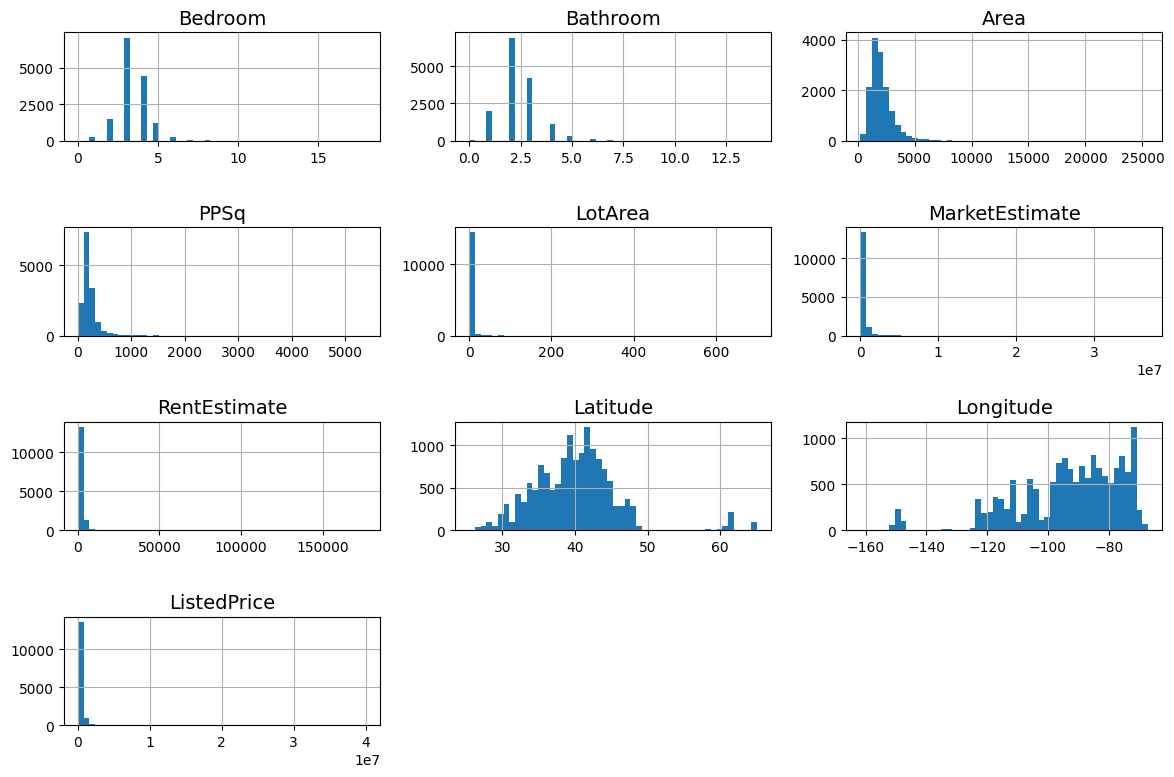

In [193]:
import matplotlib.pyplot as plt

# extra code – the next 5 lines define the default font sizes
plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

housing.hist(bins=50, figsize=(12, 8))
save_fig("attribute_histogram_plots")  # extra code
plt.show()

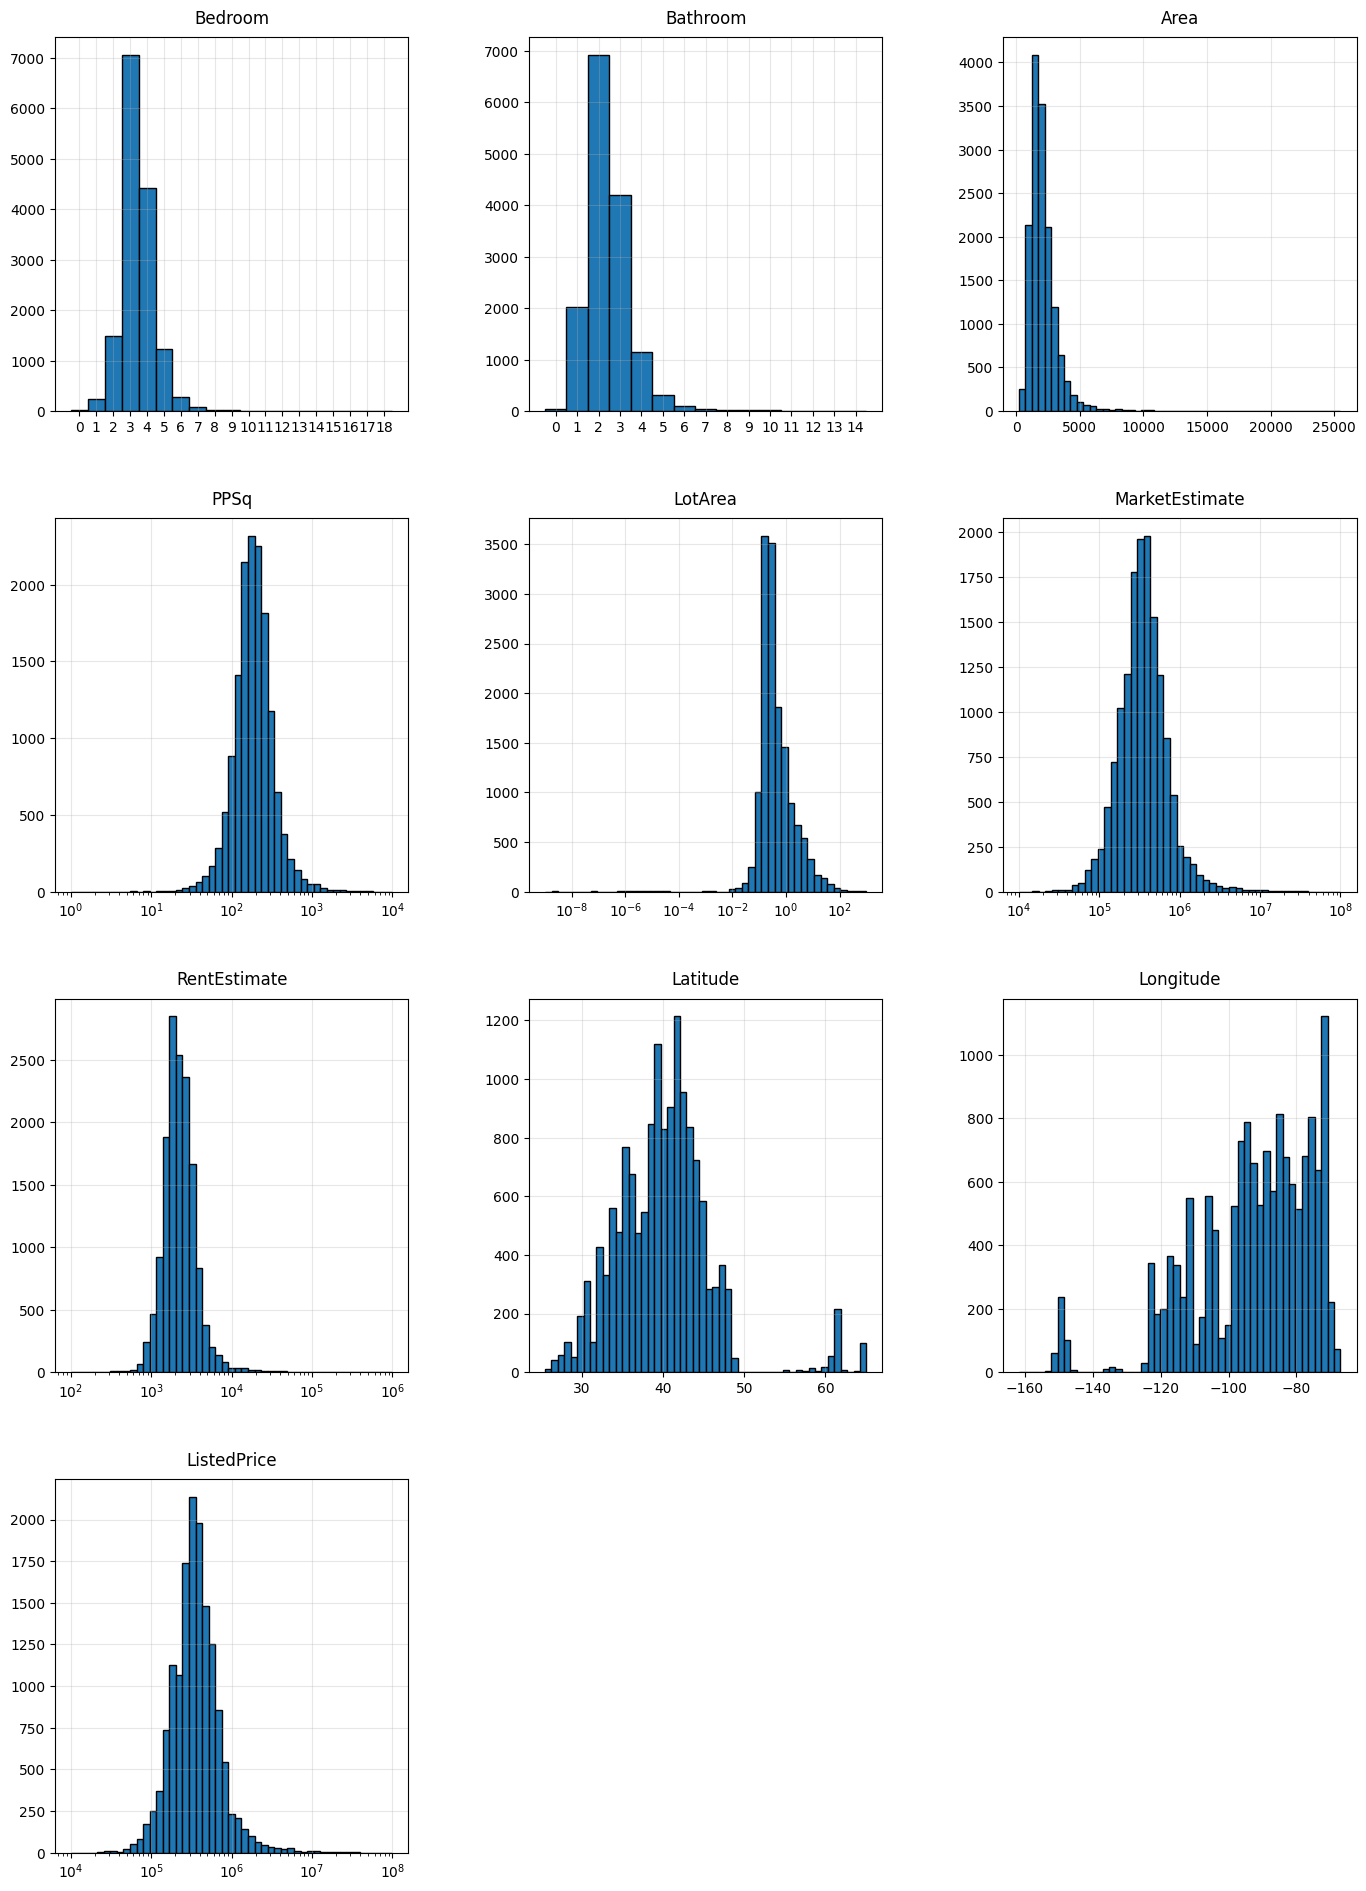

In [194]:
import matplotlib.pyplot as plt
import numpy as np

# Create subplots
fig, axes = plt.subplots(4, 3, figsize=(15, 20))
fig.tight_layout(pad=4.0)

# Get numerical columns
numeric_cols = [col for col in housing.columns if housing[col].dtype in ['float64', 'int64']]

# Plot histograms
for i, col in enumerate(numeric_cols):
    row = i // 3
    col_idx = i % 3
    ax = axes[row, col_idx]

    if col in ['ListedPrice', 'MarketEstimate', 'RentEstimate', 'PPSq', 'LotArea']:
        # Apply log transformation for price and area related features
        data = housing[col][housing[col] > 0]  # Ensure positive values
        log_data = np.log10(data)
        min_val = np.floor(log_data.min())
        max_val = np.ceil(log_data.max())
        bins = np.logspace(min_val, max_val, 50)
        ax.hist(data, bins=bins, edgecolor='black')
        ax.set_xscale('log')
    elif col in ['Bedroom', 'Bathroom']:
        # Use integer bins for discrete values like rooms
        max_val = int(housing[col].max())
        min_val = int(housing[col].min())
        bins = range(min_val, max_val + 2)
        ax.hist(housing[col], bins=bins, edgecolor='black', align='left')
        ax.set_xticks(range(min_val, max_val + 1))
    else:
        ax.hist(housing[col], bins=50, edgecolor='black')

    ax.set_title(col, fontsize=12, pad=10)
    ax.grid(True, alpha=0.3)
    ax.tick_params(labelsize=10)

# Remove extra subplots if any
if len(numeric_cols) < 12:
    for i in range(len(numeric_cols), 12):
        fig.delaxes(axes[i // 3, i % 3])

plt.show()

## Create a Test Set

In [195]:
import numpy as np

def shuffle_and_split_data(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [196]:
train_set, test_set = shuffle_and_split_data(housing, 0.2)
len(train_set)

11883

In [197]:
len(test_set)

2970

To ensure that this notebook's outputs remain the same every time we run it, we need to set the random seed:

In [198]:
np.random.seed(42)

# Discover and Visualize the Data to Gain Insights

In [199]:
housing = train_set.copy()

## Visualizing Geographical Data

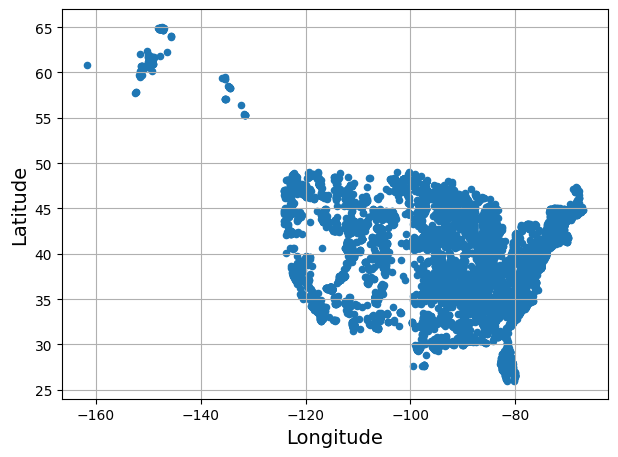

In [200]:
housing.plot(kind="scatter", x="Longitude", y="Latitude", grid=True)
save_fig("bad_visualization_plot")  # extra code
plt.show()

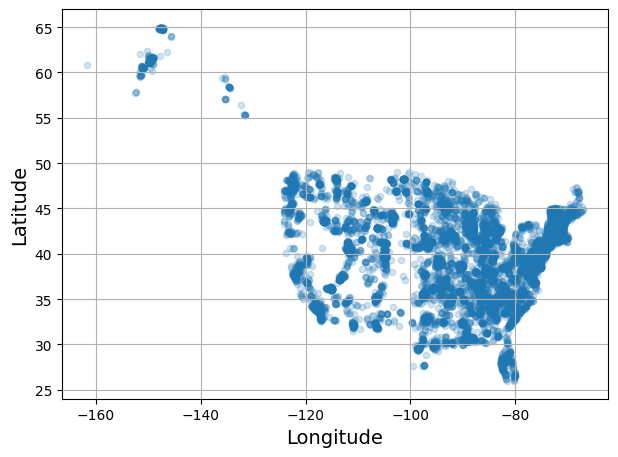

In [201]:
housing.plot(kind="scatter", x="Longitude", y="Latitude", grid=True, alpha=0.2)
save_fig("better_visualization_plot")  # extra code
plt.show()

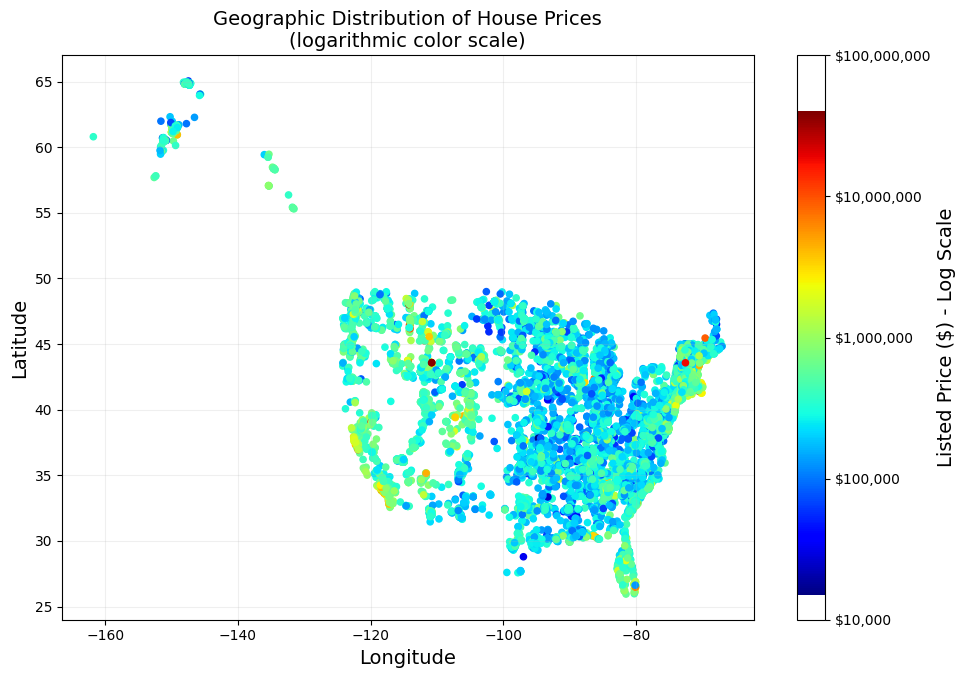

In [202]:
import matplotlib.pyplot as plt
import numpy as np

# Create the figure and axis objects
plt.figure(figsize=(10, 7))

# Get the price data and transform it to log scale for coloring
prices = housing['ListedPrice']
log_prices = np.log10(prices)

# Create scatter plot with log-scaled colors
scatter = plt.scatter(housing['Longitude'],
                     housing['Latitude'],
                     c=log_prices,  # Use log-transformed prices for coloring
                     cmap='jet',
                     s=20)

# Customize the plot appearance
plt.grid(True, alpha=0.2)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Geographic Distribution of House Prices\n(logarithmic color scale)')

# Add colorbar with custom ticks
cbar = plt.colorbar(scatter)
cbar.set_label('Listed Price ($) - Log Scale')

# Create custom colorbar ticks at each order of magnitude
log_min = np.floor(log_prices.min())
log_max = np.ceil(log_prices.max())
tick_positions = np.arange(log_min, log_max + 1)
tick_labels = ['${:,.0f}'.format(10**x) for x in tick_positions]
cbar.set_ticks(tick_positions)
cbar.set_ticklabels(tick_labels)

plt.tight_layout()
plt.show()

## Looking for Correlations

Note: since Pandas 2.0.0, the `numeric_only` argument defaults to `False`, so we need to set it explicitly to True to avoid an error.

In [203]:
corr_matrix = housing.corr(numeric_only=True)

In [204]:
corr_matrix["ListedPrice"].sort_values(ascending=False)

,ListedPrice
ListedPrice,1.000000
MarketEstimate,0.992039
RentEstimate,0.917957
PPSq,0.676082
Area,0.541350
Bathroom,0.457096
Bedroom,0.241802
LotArea,0.156004
Latitude,0.018078
Longitude,-0.056185


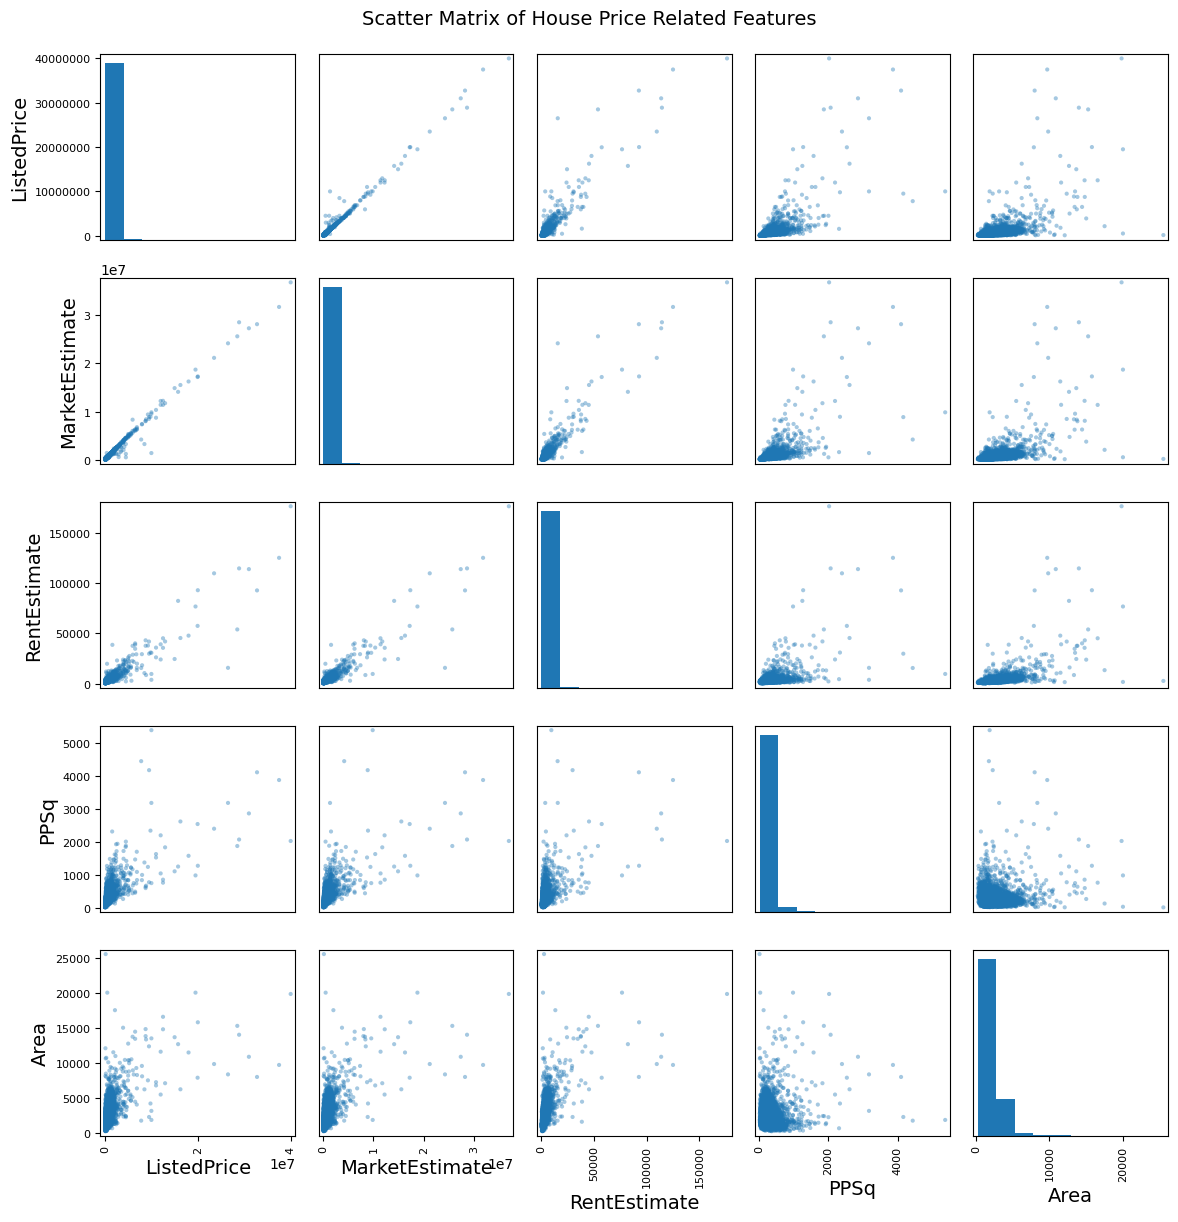

In [205]:

attributes = ["ListedPrice", "MarketEstimate", "RentEstimate", "PPSq", "Area"]

scatter_matrix(housing[attributes],
              figsize=(12, 12),
              diagonal='hist',
              alpha=0.4,
              grid=True)
plt.tight_layout()

plt.suptitle('Scatter Matrix of House Price Related Features',
            y=1.02,
            fontsize=14)

plt.show()

# Price Premium Ratio Analysis


## Premium Ratio Correlation Analysis



In [173]:
#housing = pd.DataFrame(housing)
#housing["PremiumRatio"] = ((housing["ListedPrice"] - housing["MarketEstimate"]) / housing["MarketEstimate"]) * 100


In [206]:
#corr_matrix = housing.corr(numeric_only=True)
#corr_matrix["PremiumRatio"].sort_values(ascending=False)


# Experimenting with Attribute Combinations

In [207]:
# Building area to lot area ratio
housing['area_ratio'] = housing['Area'] / housing['LotArea']

# Average area per bedroom
housing['area_per_bedroom'] = housing['Area'] / housing['Bedroom']

# Bathroom to bedroom ratio
housing['bath_bed_ratio'] = housing['Bathroom'] / housing['Bedroom']

# Estimated rent per square foot
housing['rent_per_sqft'] = housing['RentEstimate'] / housing['Area']

# Annual rental return rate (%)
housing['rent_return_ratio'] = (housing['RentEstimate'] * 12) / housing['ListedPrice'] * 100

In [208]:
corr_matrix = housing.corr(numeric_only=True)
corr_matrix["ListedPrice"].sort_values(ascending=False)

,ListedPrice
ListedPrice,1.000000
MarketEstimate,0.992039
RentEstimate,0.917957
PPSq,0.676082
Area,0.541350
Bathroom,0.457096
rent_per_sqft,0.449629
area_per_bedroom,0.386542
bath_bed_ratio,0.254961
Bedroom,0.241802


# Prepare the Data for Machine Learning Algorithms

## Handling Text and Categorical Attributes

Continue on handling the Region and CitySize

In [209]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

# Initialize OneHotEncoder
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

# Encode Region and CitySize
categorical_features = ['Region', 'CitySize']
encoded_features = encoder.fit_transform(housing[categorical_features])

# Get feature names for encoded columns
feature_names = []
for i, feature in enumerate(categorical_features):
    feature_names.extend([f"{feature}_{cat}" for cat in encoder.categories_[i]])

# Create DataFrame with encoded features
encoded_df = pd.DataFrame(encoded_features, columns=feature_names, index=housing.index)

# Combine encoded features with original DataFrame
housing = pd.concat([housing.drop(columns=categorical_features), encoded_df], axis=1)

display(housing)
housing.info()

,Bedroom,Bathroom,Area,PPSq,LotArea,MarketEstimate,RentEstimate,Latitude,Longitude,ListedPrice,...,bath_bed_ratio,rent_per_sqft,rent_return_ratio,Region_Midwest,Region_Northeast,Region_South,Region_West,CitySize_Large,CitySize_Medium,CitySize_Small
22367,3.0,2.0,1456.0,295.260989,0.405854,426600.0,1999.0,44.574510,-106.898670,429900.0,...,0.666667,1.372940,5.579902,0.0,0.0,0.0,1.0,0.0,0.0,1.0
6631,5.0,4.0,3561.0,358.045493,0.640000,1208700.0,7971.0,41.579033,-93.676610,1275000.0,...,0.800000,2.238416,7.502118,1.0,0.0,0.0,0.0,0.0,0.0,1.0
15682,4.0,2.0,1479.0,131.845842,0.179100,202200.0,1250.0,41.645370,-83.470955,195000.0,...,0.500000,0.845166,7.692308,1.0,0.0,0.0,0.0,0.0,0.0,1.0
16871,4.0,1.0,1381.0,271.542361,0.081612,373900.0,2299.0,39.842690,-75.711060,375000.0,...,0.250000,1.664736,7.356800,0.0,1.0,0.0,0.0,0.0,0.0,1.0
13886,4.0,2.0,1610.0,177.018634,0.190000,277300.0,2100.0,35.103157,-106.580100,285000.0,...,0.500000,1.304348,8.842105,0.0,0.0,0.0,1.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8650,4.0,2.0,2174.0,206.945722,1.660000,450300.0,3214.0,39.358590,-77.269950,449900.0,...,0.500000,1.478381,8.572572,0.0,0.0,1.0,0.0,0.0,0.0,1.0
20683,3.0,2.0,3012.0,182.569721,1.239700,481900.0,2700.0,38.640020,-77.543940,549900.0,...,0.666667,0.896414,5.891980,0.0,0.0,1.0,0.0,0.0,0.0,1.0
8906,3.0,2.0,1732.0,187.644342,0.189164,325100.0,2045.0,39.636640,-77.412300,325000.0,...,0.666667,1.180716,7.550769,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1548,5.0,3.0,3120.0,144.198718,0.360009,456900.0,3007.0,35.891270,-90.645060,449900.0,...,0.600000,0.963782,8.020449,0.0,0.0,1.0,0.0,0.0,0.0,1.0


<class 'pandas.core.frame.DataFrame'>
Index: 11883 entries, 22367 to 11267
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Bedroom            11883 non-null  float64
 1   Bathroom           11883 non-null  float64
 2   Area               11883 non-null  float64
 3   PPSq               11883 non-null  float64
 4   LotArea            11883 non-null  float64
 5   MarketEstimate     11883 non-null  float64
 6   RentEstimate       11883 non-null  float64
 7   Latitude           11883 non-null  float64
 8   Longitude          11883 non-null  float64
 9   ListedPrice        11883 non-null  float64
 10  area_ratio         11883 non-null  float64
 11  area_per_bedroom   11883 non-null  float64
 12  bath_bed_ratio     11875 non-null  float64
 13  rent_per_sqft      11883 non-null  float64
 14  rent_return_ratio  11883 non-null  float64
 15  Region_Midwest     11883 non-null  float64
 16  Region_Northeast   1188

## Feature Scaling

What if we replace each value with its percentile?

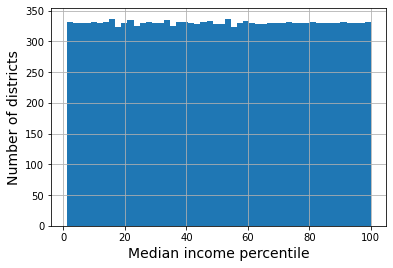

In [ ]:
# extra code – just shows that we get a uniform distribution
percentiles = [np.percentile(housing["median_income"], p)
               for p in range(1, 100)]
flattened_median_income = pd.cut(housing["median_income"],
                                 bins=[-np.inf] + percentiles + [np.inf],
                                 labels=range(1, 100 + 1))
flattened_median_income.hist(bins=50)
plt.xlabel("Median income percentile")
plt.ylabel("Number of districts")
plt.show()
# Note: incomes below the 1st percentile are labeled 1, and incomes above the
# 99th percentile are labeled 100. This is why the distribution below ranges
# from 1 to 100 (not 0 to 100).

In [ ]:
from sklearn.metrics.pairwise import rbf_kernel

age_simil_35 = rbf_kernel(housing[["housing_median_age"]], [[35]], gamma=0.1)

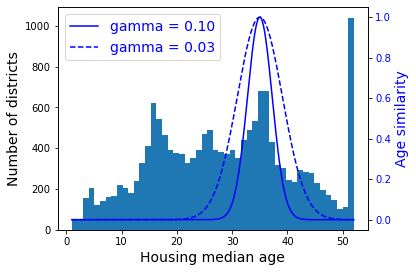

In [ ]:
# extra code – this cell generates Figure 2–18

ages = np.linspace(housing["housing_median_age"].min(),
                   housing["housing_median_age"].max(),
                   500).reshape(-1, 1)
gamma1 = 0.1
gamma2 = 0.03
rbf1 = rbf_kernel(ages, [[35]], gamma=gamma1)
rbf2 = rbf_kernel(ages, [[35]], gamma=gamma2)

fig, ax1 = plt.subplots()

ax1.set_xlabel("Housing median age")
ax1.set_ylabel("Number of districts")
ax1.hist(housing["housing_median_age"], bins=50)

ax2 = ax1.twinx()  # create a twin axis that shares the same x-axis
color = "blue"
ax2.plot(ages, rbf1, color=color, label="gamma = 0.10")
ax2.plot(ages, rbf2, color=color, label="gamma = 0.03", linestyle="--")
ax2.tick_params(axis='y', labelcolor=color)
ax2.set_ylabel("Age similarity", color=color)

plt.legend(loc="upper left")
save_fig("age_similarity_plot")
plt.show()

In [ ]:
from sklearn.linear_model import LinearRegression

target_scaler = StandardScaler()
scaled_labels = target_scaler.fit_transform(housing_labels.to_frame())

model = LinearRegression()
model.fit(housing[["median_income"]], scaled_labels)
some_new_data = housing[["median_income"]].iloc[:5]  # pretend this is new data

scaled_predictions = model.predict(some_new_data)
predictions = target_scaler.inverse_transform(scaled_predictions)

In [ ]:
predictions

array([[131997.15275877],
       [299359.35844434],
       [146023.37185694],
       [138840.33653057],
       [192016.61557639]])

In [ ]:
from sklearn.compose import TransformedTargetRegressor

model = TransformedTargetRegressor(LinearRegression(),
                                   transformer=StandardScaler())
model.fit(housing[["median_income"]], housing_labels)
predictions = model.predict(some_new_data)

In [ ]:
predictions

array([131997.15275877, 299359.35844434, 146023.37185694, 138840.33653057,
       192016.61557639])

## Custom Transformers

To create simple transformers:

In [ ]:
from sklearn.preprocessing import FunctionTransformer

log_transformer = FunctionTransformer(np.log, inverse_func=np.exp)
log_pop = log_transformer.transform(housing[["population"]])

In [ ]:
rbf_transformer = FunctionTransformer(rbf_kernel,
                                      kw_args=dict(Y=[[35.]], gamma=0.1))
age_simil_35 = rbf_transformer.transform(housing[["housing_median_age"]])

In [ ]:
age_simil_35

array([[2.81118530e-13],
       [8.20849986e-02],
       [6.70320046e-01],
       ...,
       [9.55316054e-22],
       [6.70320046e-01],
       [3.03539138e-04]])

In [ ]:
sf_coords = 37.7749, -122.41
sf_transformer = FunctionTransformer(rbf_kernel,
                                     kw_args=dict(Y=[sf_coords], gamma=0.1))
sf_simil = sf_transformer.transform(housing[["latitude", "longitude"]])

In [ ]:
sf_simil

array([[0.999927  ],
       [0.05258419],
       [0.94864161],
       ...,
       [0.00388525],
       [0.05038518],
       [0.99868067]])

In [ ]:
ratio_transformer = FunctionTransformer(lambda X: X[:, [0]] / X[:, [1]])
ratio_transformer.transform(np.array([[1., 2.], [3., 4.]]))

array([[0.5 ],
       [0.75]])

In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.utils.validation import check_array, check_is_fitted

class StandardScalerClone(BaseEstimator, TransformerMixin):
    def __init__(self, with_mean=True):  # no *args or **kwargs!
        self.with_mean = with_mean

    def fit(self, X, y=None):  # y is required even though we don't use it
        X = check_array(X)  # checks that X is an array with finite float values
        self.mean_ = X.mean(axis=0)
        self.scale_ = X.std(axis=0)
        self.n_features_in_ = X.shape[1]  # every estimator stores this in fit()
        return self  # always return self!

    def transform(self, X):
        check_is_fitted(self)  # looks for learned attributes (with trailing _)
        X = check_array(X)
        assert self.n_features_in_ == X.shape[1]
        if self.with_mean:
            X = X - self.mean_
        return X / self.scale_

In [ ]:
from sklearn.cluster import KMeans

class ClusterSimilarity(BaseEstimator, TransformerMixin):
    def __init__(self, n_clusters=10, gamma=1.0, random_state=None):
        self.n_clusters = n_clusters
        self.gamma = gamma
        self.random_state = random_state

    def fit(self, X, y=None, sample_weight=None):
        self.kmeans_ = KMeans(self.n_clusters, n_init=10,
                              random_state=self.random_state)
        self.kmeans_.fit(X, sample_weight=sample_weight)
        return self  # always return self!

    def transform(self, X):
        return rbf_kernel(X, self.kmeans_.cluster_centers_, gamma=self.gamma)

    def get_feature_names_out(self, names=None):
        return [f"Cluster {i} similarity" for i in range(self.n_clusters)]

**Warning**:
* There was a change in Scikit-Learn 1.3.0 which affected the random number generator for `KMeans` initialization. Therefore the results will be different than in the book if you use Scikit-Learn ≥ 1.3. That's not a problem as long as you don't expect the outputs to be perfectly identical.
* Throughout this notebook, when `n_init` was not set when creating a `KMeans` estimator, I explicitly set it to `n_init=10` to avoid a warning about the fact that the default value for this hyperparameter will change from 10 to `"auto"` in Scikit-Learn 1.4.

In [ ]:
cluster_simil = ClusterSimilarity(n_clusters=10, gamma=1., random_state=42)
similarities = cluster_simil.fit_transform(housing[["latitude", "longitude"]],
                                           sample_weight=housing_labels)

In [ ]:
similarities[:3].round(2)

array([[0.  , 0.14, 0.  , 0.  , 0.  , 0.08, 0.  , 0.99, 0.  , 0.6 ],
       [0.63, 0.  , 0.99, 0.  , 0.  , 0.  , 0.04, 0.  , 0.11, 0.  ],
       [0.  , 0.29, 0.  , 0.  , 0.01, 0.44, 0.  , 0.7 , 0.  , 0.3 ]])

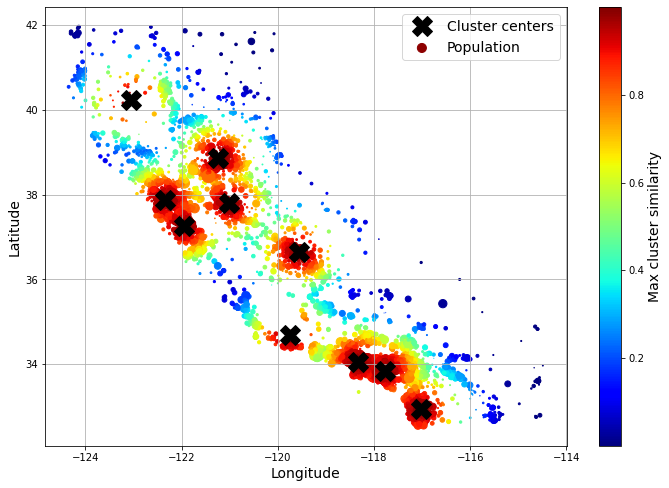

In [ ]:
# extra code – this cell generates Figure 2–19

housing_renamed = housing.rename(columns={
    "latitude": "Latitude", "longitude": "Longitude",
    "population": "Population",
    "median_house_value": "Median house value (ᴜsᴅ)"})
housing_renamed["Max cluster similarity"] = similarities.max(axis=1)

housing_renamed.plot(kind="scatter", x="Longitude", y="Latitude", grid=True,
                     s=housing_renamed["Population"] / 100, label="Population",
                     c="Max cluster similarity",
                     cmap="jet", colorbar=True,
                     legend=True, sharex=False, figsize=(10, 7))
plt.plot(cluster_simil.kmeans_.cluster_centers_[:, 1],
         cluster_simil.kmeans_.cluster_centers_[:, 0],
         linestyle="", color="black", marker="X", markersize=20,
         label="Cluster centers")
plt.legend(loc="upper right")
save_fig("district_cluster_plot")
plt.show()

## Transformation Pipelines

Now let's build a pipeline to preprocess the numerical attributes:

In [ ]:
from sklearn.pipeline import Pipeline

num_pipeline = Pipeline([
    ("impute", SimpleImputer(strategy="median")),
    ("standardize", StandardScaler()),
])

In [ ]:
from sklearn.pipeline import make_pipeline

num_pipeline = make_pipeline(SimpleImputer(strategy="median"), StandardScaler())

In [ ]:
from sklearn import set_config

set_config(display='diagram')

num_pipeline

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('standardscaler', StandardScaler())])

In [ ]:
housing_num_prepared = num_pipeline.fit_transform(housing_num)
housing_num_prepared[:2].round(2)

array([[-1.42,  1.01,  1.86,  0.31,  1.37,  0.14,  1.39, -0.94],
       [ 0.6 , -0.7 ,  0.91, -0.31, -0.44, -0.69, -0.37,  1.17]])

In [ ]:
def monkey_patch_get_signature_names_out():
    """Monkey patch some classes which did not handle get_feature_names_out()
       correctly in Scikit-Learn 1.0.*."""
    from inspect import Signature, signature, Parameter
    import pandas as pd
    from sklearn.impute import SimpleImputer
    from sklearn.pipeline import make_pipeline, Pipeline
    from sklearn.preprocessing import FunctionTransformer, StandardScaler

    default_get_feature_names_out = StandardScaler.get_feature_names_out

    if not hasattr(SimpleImputer, "get_feature_names_out"):
      print("Monkey-patching SimpleImputer.get_feature_names_out()")
      SimpleImputer.get_feature_names_out = default_get_feature_names_out

    if not hasattr(FunctionTransformer, "get_feature_names_out"):
        print("Monkey-patching FunctionTransformer.get_feature_names_out()")
        orig_init = FunctionTransformer.__init__
        orig_sig = signature(orig_init)

        def __init__(*args, feature_names_out=None, **kwargs):
            orig_sig.bind(*args, **kwargs)
            orig_init(*args, **kwargs)
            args[0].feature_names_out = feature_names_out

        __init__.__signature__ = Signature(
            list(signature(orig_init).parameters.values()) + [
                Parameter("feature_names_out", Parameter.KEYWORD_ONLY)])

        def get_feature_names_out(self, names=None):
            if callable(self.feature_names_out):
                return self.feature_names_out(self, names)
            assert self.feature_names_out == "one-to-one"
            return default_get_feature_names_out(self, names)

        FunctionTransformer.__init__ = __init__
        FunctionTransformer.get_feature_names_out = get_feature_names_out

monkey_patch_get_signature_names_out()

In [ ]:
df_housing_num_prepared = pd.DataFrame(
    housing_num_prepared, columns=num_pipeline.get_feature_names_out(),
    index=housing_num.index)

In [ ]:
df_housing_num_prepared.head(2)  # extra code

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
13096,-1.423037,1.013606,1.861119,0.311912,1.368167,0.137460,1.394812,-0.936491
14973,0.596394,-0.702103,0.907630,-0.308620,-0.435925,-0.693771,-0.373485,1.171942


In [ ]:
num_pipeline.steps

[('simpleimputer', SimpleImputer(strategy='median')),
 ('standardscaler', StandardScaler())]

In [ ]:
num_pipeline[1]

StandardScaler()

In [ ]:
num_pipeline[:-1]

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median'))])

In [ ]:
num_pipeline.named_steps["simpleimputer"]

SimpleImputer(strategy='median')

In [ ]:
num_pipeline.set_params(simpleimputer__strategy="median")

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('standardscaler', StandardScaler())])

In [ ]:
from sklearn.compose import ColumnTransformer

num_attribs = ["longitude", "latitude", "housing_median_age", "total_rooms",
               "total_bedrooms", "population", "households", "median_income"]
cat_attribs = ["ocean_proximity"]

cat_pipeline = make_pipeline(
    SimpleImputer(strategy="most_frequent"),
    OneHotEncoder(handle_unknown="ignore"))

preprocessing = ColumnTransformer([
    ("num", num_pipeline, num_attribs),
    ("cat", cat_pipeline, cat_attribs),
])

In [ ]:
from sklearn.compose import make_column_selector, make_column_transformer

preprocessing = make_column_transformer(
    (num_pipeline, make_column_selector(dtype_include=np.number)),
    (cat_pipeline, make_column_selector(dtype_include=object)),
)

In [ ]:
housing_prepared = preprocessing.fit_transform(housing)

In [ ]:
# extra code – shows that we can get a DataFrame out if we want
housing_prepared_fr = pd.DataFrame(
    housing_prepared,
    columns=preprocessing.get_feature_names_out(),
    index=housing.index)
housing_prepared_fr.head(2)

,pipeline-1__longitude,pipeline-1__latitude,pipeline-1__housing_median_age,pipeline-1__total_rooms,pipeline-1__total_bedrooms,pipeline-1__population,pipeline-1__households,pipeline-1__median_income,pipeline-2__ocean_proximity_<1H OCEAN,pipeline-2__ocean_proximity_INLAND,pipeline-2__ocean_proximity_ISLAND,pipeline-2__ocean_proximity_NEAR BAY,pipeline-2__ocean_proximity_NEAR OCEAN
13096,-1.423037,1.013606,1.861119,0.311912,1.368167,0.137460,1.394812,-0.936491,0.0,0.0,0.0,1.0,0.0
14973,0.596394,-0.702103,0.907630,-0.308620,-0.435925,-0.693771,-0.373485,1.171942,1.0,0.0,0.0,0.0,0.0


In [ ]:
def column_ratio(X):
    return X[:, [0]] / X[:, [1]]

def ratio_name(function_transformer, feature_names_in):
    return ["ratio"]  # feature names out

def ratio_pipeline():
    return make_pipeline(
        SimpleImputer(strategy="median"),
        FunctionTransformer(column_ratio, feature_names_out=ratio_name),
        StandardScaler())

log_pipeline = make_pipeline(
    SimpleImputer(strategy="median"),
    FunctionTransformer(np.log, feature_names_out="one-to-one"),
    StandardScaler())
cluster_simil = ClusterSimilarity(n_clusters=10, gamma=1., random_state=42)
default_num_pipeline = make_pipeline(SimpleImputer(strategy="median"),
                                     StandardScaler())
preprocessing = ColumnTransformer([
        ("bedrooms", ratio_pipeline(), ["total_bedrooms", "total_rooms"]),
        ("rooms_per_house", ratio_pipeline(), ["total_rooms", "households"]),
        ("people_per_house", ratio_pipeline(), ["population", "households"]),
        ("log", log_pipeline, ["total_bedrooms", "total_rooms", "population",
                               "households", "median_income"]),
        ("geo", cluster_simil, ["latitude", "longitude"]),
        ("cat", cat_pipeline, make_column_selector(dtype_include=object)),
    ],
    remainder=default_num_pipeline)  # one column remaining: housing_median_age

In [ ]:
housing_prepared = preprocessing.fit_transform(housing)
housing_prepared.shape

(16512, 24)

In [ ]:
preprocessing.get_feature_names_out()

array(['bedrooms__ratio', 'rooms_per_house__ratio',
       'people_per_house__ratio', 'log__total_bedrooms',
       'log__total_rooms', 'log__population', 'log__households',
       'log__median_income', 'geo__Cluster 0 similarity',
       'geo__Cluster 1 similarity', 'geo__Cluster 2 similarity',
       'geo__Cluster 3 similarity', 'geo__Cluster 4 similarity',
       'geo__Cluster 5 similarity', 'geo__Cluster 6 similarity',
       'geo__Cluster 7 similarity', 'geo__Cluster 8 similarity',
       'geo__Cluster 9 similarity', 'cat__ocean_proximity_<1H OCEAN',
       'cat__ocean_proximity_INLAND', 'cat__ocean_proximity_ISLAND',
       'cat__ocean_proximity_NEAR BAY', 'cat__ocean_proximity_NEAR OCEAN',
       'remainder__housing_median_age'], dtype=object)

# Select and Train a Model

## Training and Evaluating on the Training Set

In [ ]:
from sklearn.linear_model import LinearRegression

lin_reg = make_pipeline(preprocessing, LinearRegression())
lin_reg.fit(housing, housing_labels)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                              SimpleImputer(strategy='median')),
                                                             ('standardscaler',
                                                              StandardScaler())]),
                                   transformers=[('bedrooms',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('functiontransformer',
                                                                   FunctionTransformer(feature_names_out=<function ratio_name at 0x1a5...
                                                   'households',
                                                   'median_income']),
            

Let's try the full preprocessing pipeline on a few training instances:

In [ ]:
housing_predictions = lin_reg.predict(housing)
housing_predictions[:5].round(-2)  # -2 = rounded to the nearest hundred

array([243700., 372400., 128800.,  94400., 328300.])

Compare against the actual values:

In [ ]:
housing_labels.iloc[:5].values

array([458300., 483800., 101700.,  96100., 361800.])

In [ ]:
# extra code – computes the error ratios discussed in the book
error_ratios = housing_predictions[:5].round(-2) / housing_labels.iloc[:5].values - 1
print(", ".join([f"{100 * ratio:.1f}%" for ratio in error_ratios]))

-46.8%, -23.0%, 26.6%, -1.8%, -9.3%


In [ ]:
from sklearn.metrics import mean_squared_error

lin_rmse = mean_squared_error(housing_labels, housing_predictions,
                              squared=False)
lin_rmse

68687.89176589991

In [ ]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = make_pipeline(preprocessing, DecisionTreeRegressor(random_state=42))
tree_reg.fit(housing, housing_labels)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                              SimpleImputer(strategy='median')),
                                                             ('standardscaler',
                                                              StandardScaler())]),
                                   transformers=[('bedrooms',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('functiontransformer',
                                                                   FunctionTransformer(feature_names_out=<function ratio_name at 0x1a5...
                                                 ('geo',
                                                  ClusterSimilarity(random_state=42),
    

In [ ]:
housing_predictions = tree_reg.predict(housing)
tree_rmse = mean_squared_error(housing_labels, housing_predictions,
                              squared=False)
tree_rmse

0.0

## Better Evaluation Using Cross-Validation

In [ ]:
from sklearn.model_selection import cross_val_score

tree_rmses = -cross_val_score(tree_reg, housing, housing_labels,
                              scoring="neg_root_mean_squared_error", cv=10)

In [ ]:
pd.Series(tree_rmses).describe()

count       10.000000
mean     66868.027288
std       2060.966425
min      63649.536493
25%      65338.078316
50%      66801.953094
75%      68229.934454
max      70094.778246
dtype: float64

In [ ]:
# extra code – computes the error stats for the linear model
lin_rmses = -cross_val_score(lin_reg, housing, housing_labels,
                              scoring="neg_root_mean_squared_error", cv=10)
pd.Series(lin_rmses).describe()

count       10.000000
mean     69858.018195
std       4182.205077
min      65397.780144
25%      68070.536263
50%      68619.737842
75%      69810.076342
max      80959.348171
dtype: float64

**Warning:** the following cell may take a few minutes to run:

In [ ]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = make_pipeline(preprocessing,
                           RandomForestRegressor(random_state=42))
forest_rmses = -cross_val_score(forest_reg, housing, housing_labels,
                                scoring="neg_root_mean_squared_error", cv=10)

In [ ]:
pd.Series(forest_rmses).describe()

count       10.000000
mean     47019.561281
std       1033.957120
min      45458.112527
25%      46464.031184
50%      46967.596354
75%      47325.694987
max      49243.765795
dtype: float64

Let's compare this RMSE measured using cross-validation (the "validation error") with the RMSE measured on the training set (the "training error"):

In [ ]:
forest_reg.fit(housing, housing_labels)
housing_predictions = forest_reg.predict(housing)
forest_rmse = mean_squared_error(housing_labels, housing_predictions,
                                 squared=False)
forest_rmse

17474.619286483998

The training error is much lower than the validation error, which usually means that the model has overfit the training set. Another possible explanation may be that there's a mismatch between the training data and the validation data, but it's not the case here, since both came from the same dataset that we shuffled and split in two parts.

# Fine-Tune Your Model

## Grid Search

**Warning:** the following cell may take a few minutes to run:

In [ ]:
from sklearn.model_selection import GridSearchCV

full_pipeline = Pipeline([
    ("preprocessing", preprocessing),
    ("random_forest", RandomForestRegressor(random_state=42)),
])
param_grid = [
    {'preprocessing__geo__n_clusters': [5, 8, 10],
     'random_forest__max_features': [4, 6, 8]},
    {'preprocessing__geo__n_clusters': [10, 15],
     'random_forest__max_features': [6, 8, 10]},
]
grid_search = GridSearchCV(full_pipeline, param_grid, cv=3,
                           scoring='neg_root_mean_squared_error')
grid_search.fit(housing, housing_labels)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                                                     SimpleImputer(strategy='median')),
                                                                                    ('standardscaler',
                                                                                     StandardScaler())]),
                                                          transformers=[('bedrooms',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('functiontransformer',
                                                               

You can get the full list of hyperparameters available for tuning by looking at `full_pipeline.get_params().keys()`:

In [ ]:
# extra code – shows part of the output of get_params().keys()
print(str(full_pipeline.get_params().keys())[:1000] + "...")

dict_keys(['memory', 'steps', 'verbose', 'preprocessing', 'random_forest', 'preprocessing__n_jobs', 'preprocessing__remainder__memory', 'preprocessing__remainder__steps', 'preprocessing__remainder__verbose', 'preprocessing__remainder__simpleimputer', 'preprocessing__remainder__standardscaler', 'preprocessing__remainder__simpleimputer__add_indicator', 'preprocessing__remainder__simpleimputer__copy', 'preprocessing__remainder__simpleimputer__fill_value', 'preprocessing__remainder__simpleimputer__missing_values', 'preprocessing__remainder__simpleimputer__strategy', 'preprocessing__remainder__simpleimputer__verbose', 'preprocessing__remainder__standardscaler__copy', 'preprocessing__remainder__standardscaler__with_mean', 'preprocessing__remainder__standardscaler__with_std', 'preprocessing__remainder', 'preprocessing__sparse_threshold', 'preprocessing__transformer_weights', 'preprocessing__transformers', 'preprocessing__verbose', 'preprocessing__verbose_feature_names_out', 'preprocessing__be

The best hyperparameter combination found:

In [ ]:
grid_search.best_params_

{'preprocessing__geo__n_clusters': 15, 'random_forest__max_features': 6}

In [ ]:
grid_search.best_estimator_

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                              SimpleImputer(strategy='median')),
                                                             ('standardscaler',
                                                              StandardScaler())]),
                                   transformers=[('bedrooms',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('functiontransformer',
                                                                   FunctionTransformer(feature_names_out=<function ratio_name at 0x1a5b6fd...
                                                  ClusterSimilarity(n_clusters=15,
                                                                

Let's look at the score of each hyperparameter combination tested during the grid search:

In [ ]:
cv_res = pd.DataFrame(grid_search.cv_results_)
cv_res.sort_values(by="mean_test_score", ascending=False, inplace=True)

# extra code – these few lines of code just make the DataFrame look nicer
cv_res = cv_res[["param_preprocessing__geo__n_clusters",
                 "param_random_forest__max_features", "split0_test_score",
                 "split1_test_score", "split2_test_score", "mean_test_score"]]
score_cols = ["split0", "split1", "split2", "mean_test_rmse"]
cv_res.columns = ["n_clusters", "max_features"] + score_cols
cv_res[score_cols] = -cv_res[score_cols].round().astype(np.int64)

cv_res.head()

,n_clusters,max_features,split0,split1,split2,mean_test_rmse
12,15,6,43460,43919,44748,44042
13,15,8,44132,44075,45010,44406
14,15,10,44374,44286,45316,44659
7,10,6,44683,44655,45657,44999
9,10,6,44683,44655,45657,44999


## Randomized Search

In [ ]:
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingRandomSearchCV

Try 30 (`n_iter` × `cv`) random combinations of hyperparameters:

**Warning:** the following cell may take a few minutes to run:

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distribs = {'preprocessing__geo__n_clusters': randint(low=3, high=50),
                  'random_forest__max_features': randint(low=2, high=20)}

rnd_search = RandomizedSearchCV(
    full_pipeline, param_distributions=param_distribs, n_iter=10, cv=3,
    scoring='neg_root_mean_squared_error', random_state=42)

rnd_search.fit(housing, housing_labels)

RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('preprocessing',
                                              ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                                                           SimpleImputer(strategy='median')),
                                                                                          ('standardscaler',
                                                                                           StandardScaler())]),
                                                                transformers=[('bedrooms',
                                                                               Pipeline(steps=[('simpleimputer',
                                                                                                SimpleImputer(strategy='median')),
                                                                                               ('functiontransformer',
   

In [ ]:
# extra code – displays the random search results
cv_res = pd.DataFrame(rnd_search.cv_results_)
cv_res.sort_values(by="mean_test_score", ascending=False, inplace=True)
cv_res = cv_res[["param_preprocessing__geo__n_clusters",
                 "param_random_forest__max_features", "split0_test_score",
                 "split1_test_score", "split2_test_score", "mean_test_score"]]
cv_res.columns = ["n_clusters", "max_features"] + score_cols
cv_res[score_cols] = -cv_res[score_cols].round().astype(np.int64)
cv_res.head()

,n_clusters,max_features,split0,split1,split2,mean_test_rmse
1,45,9,41287,42150,42627,42021
8,32,7,41690,42542,43224,42485
0,41,16,42223,42959,43321,42834
5,42,4,41818,43094,43817,42910
2,23,8,42264,42996,43830,43030


**Bonus section: how to choose the sampling distribution for a hyperparameter**

* `scipy.stats.randint(a, b+1)`: for hyperparameters with _discrete_ values that range from a to b, and all values in that range seem equally likely.
* `scipy.stats.uniform(a, b)`: this is very similar, but for _continuous_ hyperparameters.
* `scipy.stats.geom(1 / scale)`: for discrete values, when you want to sample roughly in a given scale. E.g., with scale=1000 most samples will be in this ballpark, but ~10% of all samples will be <100 and ~10% will be >2300.
* `scipy.stats.expon(scale)`: this is the continuous equivalent of `geom`. Just set `scale` to the most likely value.
* `scipy.stats.loguniform(a, b)`: when you have almost no idea what the optimal hyperparameter value's scale is. If you set a=0.01 and b=100, then you're just as likely to sample a value between 0.01 and 0.1 as a value between 10 and 100.


Here are plots of the probability mass functions (for discrete variables), and probability density functions (for continuous variables) for `randint()`, `uniform()`, `geom()` and `expon()`:

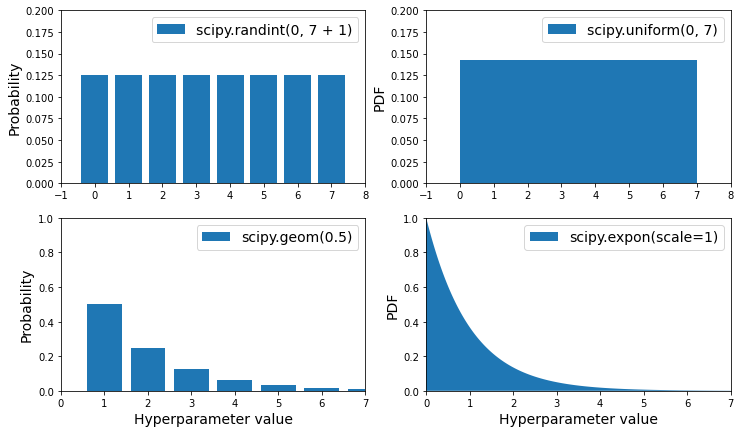

In [ ]:
# extra code – plots a few distributions you can use in randomized search

from scipy.stats import randint, uniform, geom, expon

xs1 = np.arange(0, 7 + 1)
randint_distrib = randint(0, 7 + 1).pmf(xs1)

xs2 = np.linspace(0, 7, 500)
uniform_distrib = uniform(0, 7).pdf(xs2)

xs3 = np.arange(0, 7 + 1)
geom_distrib = geom(0.5).pmf(xs3)

xs4 = np.linspace(0, 7, 500)
expon_distrib = expon(scale=1).pdf(xs4)

plt.figure(figsize=(12, 7))

plt.subplot(2, 2, 1)
plt.bar(xs1, randint_distrib, label="scipy.randint(0, 7 + 1)")
plt.ylabel("Probability")
plt.legend()
plt.axis([-1, 8, 0, 0.2])

plt.subplot(2, 2, 2)
plt.fill_between(xs2, uniform_distrib, label="scipy.uniform(0, 7)")
plt.ylabel("PDF")
plt.legend()
plt.axis([-1, 8, 0, 0.2])

plt.subplot(2, 2, 3)
plt.bar(xs3, geom_distrib, label="scipy.geom(0.5)")
plt.xlabel("Hyperparameter value")
plt.ylabel("Probability")
plt.legend()
plt.axis([0, 7, 0, 1])

plt.subplot(2, 2, 4)
plt.fill_between(xs4, expon_distrib, label="scipy.expon(scale=1)")
plt.xlabel("Hyperparameter value")
plt.ylabel("PDF")
plt.legend()
plt.axis([0, 7, 0, 1])

plt.show()

Here are the PDF for `expon()` and `loguniform()` (left column), as well as the PDF of log(X) (right column). The right column shows the distribution of hyperparameter _scales_. You can see that `expon()` favors hyperparameters with roughly the desired scale, with a longer tail towards the smaller scales. But `loguniform()` does not favor any scale, they are all equally likely:

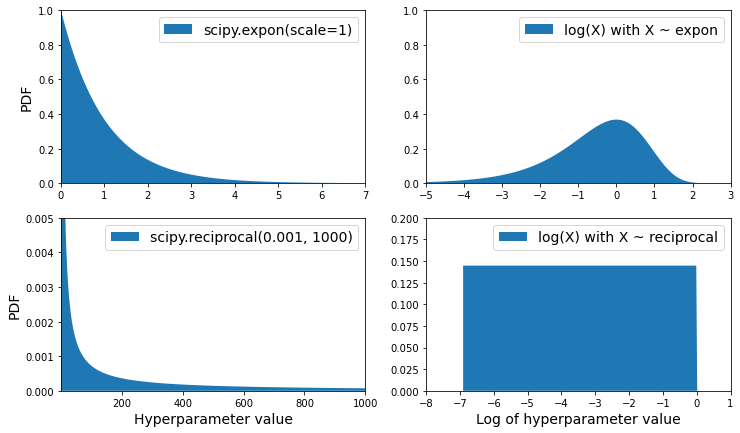

In [ ]:
# extra code – shows the difference between expon and loguniform

from scipy.stats import loguniform

xs1 = np.linspace(0, 7, 500)
expon_distrib = expon(scale=1).pdf(xs1)

log_xs2 = np.linspace(-5, 3, 500)
log_expon_distrib = np.exp(log_xs2 - np.exp(log_xs2))

xs3 = np.linspace(0.001, 1000, 500)
loguniform_distrib = loguniform(0.001, 1000).pdf(xs3)

log_xs4 = np.linspace(np.log(0.001), np.log(1000), 500)
log_loguniform_distrib = uniform(np.log(0.001), np.log(1000)).pdf(log_xs4)

plt.figure(figsize=(12, 7))

plt.subplot(2, 2, 1)
plt.fill_between(xs1, expon_distrib,
                 label="scipy.expon(scale=1)")
plt.ylabel("PDF")
plt.legend()
plt.axis([0, 7, 0, 1])

plt.subplot(2, 2, 2)
plt.fill_between(log_xs2, log_expon_distrib,
                 label="log(X) with X ~ expon")
plt.legend()
plt.axis([-5, 3, 0, 1])

plt.subplot(2, 2, 3)
plt.fill_between(xs3, loguniform_distrib,
                 label="scipy.loguniform(0.001, 1000)")
plt.xlabel("Hyperparameter value")
plt.ylabel("PDF")
plt.legend()
plt.axis([0.001, 1000, 0, 0.005])

plt.subplot(2, 2, 4)
plt.fill_between(log_xs4, log_loguniform_distrib,
                 label="log(X) with X ~ loguniform")
plt.xlabel("Log of hyperparameter value")
plt.legend()
plt.axis([-8, 1, 0, 0.2])

plt.show()

## Analyze the Best Models and Their Errors

In [ ]:
final_model = rnd_search.best_estimator_  # includes preprocessing
feature_importances = final_model["random_forest"].feature_importances_
feature_importances.round(2)

array([0.07, 0.05, 0.05, 0.01, 0.01, 0.01, 0.01, 0.19, 0.04, 0.01, 0.  ,
       0.01, 0.01, 0.01, 0.01, 0.01, 0.  , 0.01, 0.01, 0.01, 0.  , 0.01,
       0.01, 0.01, 0.01, 0.01, 0.  , 0.  , 0.02, 0.01, 0.01, 0.01, 0.02,
       0.01, 0.  , 0.02, 0.03, 0.01, 0.01, 0.01, 0.01, 0.01, 0.02, 0.01,
       0.01, 0.02, 0.01, 0.01, 0.01, 0.01, 0.01, 0.02, 0.01, 0.  , 0.07,
       0.  , 0.  , 0.  , 0.01])

In [ ]:
sorted(zip(feature_importances,
           final_model["preprocessing"].get_feature_names_out()),
           reverse=True)

[(0.18694559869103852, 'log__median_income'),
 (0.0748194905715524, 'cat__ocean_proximity_INLAND'),
 (0.06926417748515576, 'bedrooms__ratio'),
 (0.05446998753775219, 'rooms_per_house__ratio'),
 (0.05262301809680712, 'people_per_house__ratio'),
 (0.03819415873915732, 'geo__Cluster 0 similarity'),
 (0.02879263999929514, 'geo__Cluster 28 similarity'),
 (0.023530192521380392, 'geo__Cluster 24 similarity'),
 (0.020544786346378206, 'geo__Cluster 27 similarity'),
 (0.019873052631077512, 'geo__Cluster 43 similarity'),
 (0.018597511022930273, 'geo__Cluster 34 similarity'),
 (0.017409085415656868, 'geo__Cluster 37 similarity'),
 (0.015546519677632162, 'geo__Cluster 20 similarity'),
 (0.014230331127504292, 'geo__Cluster 17 similarity'),
 (0.0141032216204026, 'geo__Cluster 39 similarity'),
 (0.014065768027447325, 'geo__Cluster 9 similarity'),
 (0.01354220782825315, 'geo__Cluster 4 similarity'),
 (0.01348963625822907, 'geo__Cluster 3 similarity'),
 (0.01338319626383868, 'geo__Cluster 38 similarity'

## Evaluate Your System on the Test Set

In [ ]:
X_test = strat_test_set.drop("median_house_value", axis=1)
y_test = strat_test_set["median_house_value"].copy()

final_predictions = final_model.predict(X_test)

final_rmse = mean_squared_error(y_test, final_predictions, squared=False)
print(final_rmse)

41424.40026462184


We can compute a 95% confidence interval for the test RMSE:

In [ ]:
from scipy import stats

confidence = 0.95
squared_errors = (final_predictions - y_test) ** 2
np.sqrt(stats.t.interval(confidence, len(squared_errors) - 1,
                         loc=squared_errors.mean(),
                         scale=stats.sem(squared_errors)))

array([39275.40861216, 43467.27680583])

We could compute the interval manually like this:

In [ ]:
# extra code – shows how to compute a confidence interval for the RMSE
m = len(squared_errors)
mean = squared_errors.mean()
tscore = stats.t.ppf((1 + confidence) / 2, df=m - 1)
tmargin = tscore * squared_errors.std(ddof=1) / np.sqrt(m)
np.sqrt(mean - tmargin), np.sqrt(mean + tmargin)

(39275.40861216077, 43467.2768058342)

Alternatively, we could use a z-score rather than a t-score. Since the test set is not too small, it won't make a big difference:

In [ ]:
# extra code – computes a confidence interval again using a z-score
zscore = stats.norm.ppf((1 + confidence) / 2)
zmargin = zscore * squared_errors.std(ddof=1) / np.sqrt(m)
np.sqrt(mean - zmargin), np.sqrt(mean + zmargin)

(39276.05610140007, 43466.691749969636)

## Model persistence using joblib

Save the final model:

In [ ]:
import joblib

joblib.dump(final_model, "my_california_housing_model.pkl")

['my_california_housing_model.pkl']

Now you can deploy this model to production. For example, the following code could be a script that would run in production:

In [ ]:
import joblib

# extra code – excluded for conciseness
from sklearn.cluster import KMeans
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.metrics.pairwise import rbf_kernel

def column_ratio(X):
    return X[:, [0]] / X[:, [1]]

#class ClusterSimilarity(BaseEstimator, TransformerMixin):
#    [...]

final_model_reloaded = joblib.load("my_california_housing_model.pkl")

new_data = housing.iloc[:5]  # pretend these are new districts
predictions = final_model_reloaded.predict(new_data)

In [ ]:
predictions

array([442737.15, 457566.06, 105965.  ,  98462.  , 332992.01])

You could use pickle instead, but joblib is more efficient.